In [1]:
#load libraries
library(tm)
library(topicmodels)
library(reshape2)
library(ggplot2)
library(wordcloud)
library(pals)
library(quanteda)
library(stm)
library(lda)
library(tidytext)
library(widyr)
library(textclean)


Loading required package: NLP


Attaching package: 'ggplot2'


The following object is masked from 'package:NLP':

    annotate


Loading required package: RColorBrewer

Package version: 2.1.2

Parallel computing: 2 of 12 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: 'quanteda'


The following objects are masked from 'package:tm':

    as.DocumentTermMatrix, stopwords


The following objects are masked from 'package:NLP':

    meta, meta<-


The following object is masked from 'jupyter:irkernel':

    View


The following object is masked from 'package:utils':

    View


stm v1.3.6 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com



In [2]:
# load file
textdata <- read.csv("twts.csv")
# load eng stopwords from
english_stopwords <- readLines("https://slcladal.github.io/resources/stopwords_en.txt", encoding = "UTF-8")

In [5]:
# create corpus object
corpus <- Corpus(DataframeSource(textdata))

In [7]:
# Preprocessing chain
processedCorpus <- tm_map(processedCorpus, removeWords, english_stopwords)
processedCorpus <- tm_map(processedCorpus, removePunctuation, preserve_intra_word_dashes = TRUE)
processedCorpus <- tm_map(processedCorpus, stemDocument, language = "en")
processedCorpus <- tm_map(processedCorpus, stripWhitespace)

In [8]:
# compute document term matrix with terms >= minimumFrequency
minimumFrequency <- 5
DTM <- DocumentTermMatrix(processedCorpus, control = list(bounds = list(global = c(minimumFrequency, Inf))))
# have a look at the number of documents and terms in the matrix
dim(DTM)

[1] 2946775   80776

In [9]:
sel_idx <- slam::row_sums(DTM) > 0
DTM <- DTM[sel_idx, ]
textdata <- textdata[sel_idx, ]

In [10]:
# number of topics
K <- 20
# set random number generator seed
set.seed(9161)
# compute the LDA model, inference via 1000 iterations of Gibbs sampling
topicModel <- LDA(DTM, K, method="Gibbs", control=list(iter = 1000, verbose = 25))

K = 20; V = 80776; M = 1977100
Sampling 1000 iterations!
Iteration 25 ...
Iteration 50 ...
Iteration 75 ...
Iteration 100 ...
Iteration 125 ...
Iteration 150 ...
Iteration 175 ...
Iteration 200 ...
Iteration 225 ...
Iteration 250 ...
Iteration 275 ...
Iteration 300 ...
Iteration 325 ...
Iteration 350 ...
Iteration 375 ...
Iteration 400 ...
Iteration 425 ...
Iteration 450 ...
Iteration 475 ...
Iteration 500 ...
Iteration 525 ...
Iteration 550 ...
Iteration 575 ...
Iteration 600 ...
Iteration 625 ...
Iteration 650 ...
Iteration 675 ...
Iteration 700 ...
Iteration 725 ...
Iteration 750 ...
Iteration 775 ...
Iteration 800 ...
Iteration 825 ...
Iteration 850 ...
Iteration 875 ...
Iteration 900 ...
Iteration 925 ...
Iteration 950 ...
Iteration 975 ...
Iteration 1000 ...
Gibbs sampling completed!


In [11]:
# have a look a some of the results (posterior distributions)
tmResult <- posterior(topicModel)
# format of the resulting object
attributes(tmResult)

$names
[1] "terms"  "topics"

In [12]:
nTerms(DTM)              # lengthOfVocab

[1] 80776

In [13]:
# topics are probability distribtions over the entire vocabulary
beta <- tmResult$terms   # get beta from results
dim(beta)

[1]    20 80776

In [14]:
rowSums(beta)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [15]:
nDocs(DTM)

[1] 1977100

In [16]:
# for every document we have a probaility distribution of its contained topics
theta <- tmResult$topics 
dim(theta) 

[1] 1977100      20

In [17]:
rowSums(theta)[1:10]     # rows in theta sum to 1

1355137239257403136 1355217311544832000 1355183455777263616 1355183455777263616 
                  1                   1                   1                   1 
1355183455777263616 1355183455777263616 1355298157643628288 1355183455777263616 
                  1                   1                   1                   1 
1355297803778609152 1355234735782551552 
                  1                   1

In [18]:
terms(topicModel, 10)

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
ugandan,presid,bobi,watch,start,peopl,polic,mask,amp,vote,day,devolut,amp,make,good,candid,uganda,call,kalulu,don
kill,kyagulanyi,wine,news,back,power,arrest,wear,trump,elect,live,govern,health,year,love,nrm,god,follow,poa,nrm
stop,nup,museveni,video,today,countri,hous,dont,biden,museveni,covid,state,develop,time,wait,campaign,countri,retweet,con,support
dictat,robert,free,media,time,chang,secur,hand,fuck,presid,peopl,parti,road,thing,great,presidenti,free,kenya,che,nup
uganda,bobiwin,uganda,read,2020,leader,forc,vaccin,dont,uganda,life,scotland,hospit,end,show,nup,show,kind,pra,guy
freedom,nation,nubian,live,play,peac,home,stay,black,2021,famili,fail,job,polit,tonight,district,happen,send,por,peopl
fight,ssentamu,star,tweet,school,africa,militari,distanc,sign,win,care,problem,servic,work,morn,today,nigerian,busi,una,talk
human,congratul,kwa,post,join,futur,offic,social,shit,result,case,independ,million,person,happi,parti,artist,visit,para,money
regim,aka,pop,full,win,youth,order,covid,white,won,die,polit,busi,made,day,support,nigeria,book,mai,give
support,sevo,sana,speak,game,uganda,opposit,refus,lol,poll,work,issu,fund,rule,night,region,lay,pay,tororo,lie


In [19]:
exampleTermData <- terms(topicModel, 10)
exampleTermData[, 1:10]

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
ugandan,presid,bobi,watch,start,peopl,polic,mask,amp,vote
kill,kyagulanyi,wine,news,back,power,arrest,wear,trump,elect
stop,nup,museveni,video,today,countri,hous,dont,biden,museveni
dictat,robert,free,media,time,chang,secur,hand,fuck,presid
uganda,bobiwin,uganda,read,2020,leader,forc,vaccin,dont,uganda
freedom,nation,nubian,live,play,peac,home,stay,black,2021
fight,ssentamu,star,tweet,school,africa,militari,distanc,sign,win
human,congratul,kwa,post,join,futur,offic,social,shit,result
regim,aka,pop,full,win,youth,order,covid,white,won
support,sevo,sana,speak,game,uganda,opposit,refus,lol,poll


In [20]:
top5termsPerTopic <- terms(topicModel, 5)
topicNames <- apply(top5termsPerTopic, 2, paste, collapse=" ")


In [21]:
# visualize topics as word cloud
topicToViz <- 11

In [26]:
# use 'elect', 'vote', 'nup', 'nrm',? chose 'elect'
topicToViz <- grep('elect', topicNames)[1] # Or select a topic by a term contained in its name
# select to 40 most probable terms from the topic by sorting the term-topic-probability vector in decreasing order

In [28]:
top40terms <- sort(tmResult$terms[topicToViz,], decreasing=TRUE)[1:40]
words <- names(top40terms)

In [29]:
# extract the probabilites of each of the 40 terms
probabilities <- sort(tmResult$terms[topicToViz,], decreasing=TRUE)[1:40]

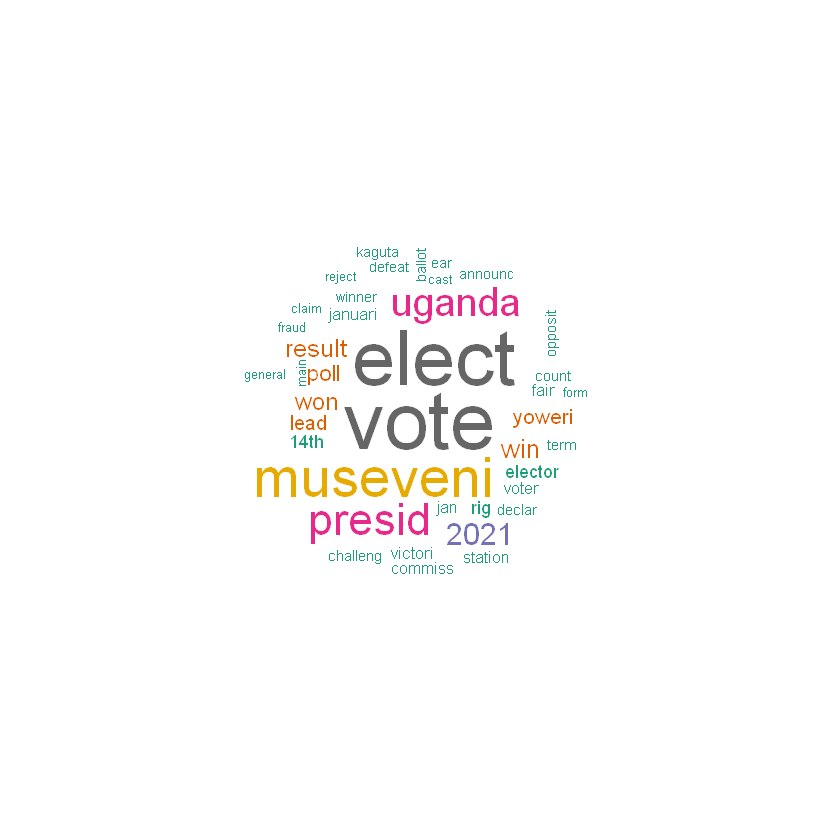

In [30]:
# visualize the terms as wordcloud
mycolors <- brewer.pal(8, "Dark2")
wordcloud(words, probabilities, random.order = FALSE, color = mycolors)

In [31]:
exampleIds <- c(2, 100, 200)
lapply(corpus[exampleIds], as.character)

$`1355217311544832000`
[1] "women are being raped by the military and children under age are in prison all women dont engage in s in"

$`1354500496124481536`
[1] "international acts from different countries are criticizing ugandas hosting of the with the country being politically unstable then we have our artist who had 2 of nigerian artists arrested woah some people are naturally dense nobodys safe in uganda"

$`1352560920988364800`
[1] "so you re bringing celebrations in the land of oppression the government has shut us down wants to totally shut us down"

In [46]:
exampleIds <- c(2, 100, 200, 400, 900, 2000)
print(paste0(exampleIds[1], ": ", substr(content(corpus[[exampleIds[1]]]), 0, 2000), '...'))

[1] "2: women are being raped by the military and children under age are in prison all women dont engage in s in..."


In [47]:
print(paste0(exampleIds[2], ": ", substr(content(corpus[[exampleIds[2]]]), 0, 2000), '...'))

[1] "100: international acts from different countries are criticizing ugandas hosting of the with the country being politically unstable then we have our artist who had 2 of nigerian artists arrested woah some people are naturally dense nobodys safe in uganda..."


In [48]:
print(paste0(exampleIds[3], ": ", substr(content(corpus[[exampleIds[3]]]), 0, 2000), '...'))

[1] "200: so you re bringing celebrations in the land of oppression the government has shut us down wants to totally shut us down..."


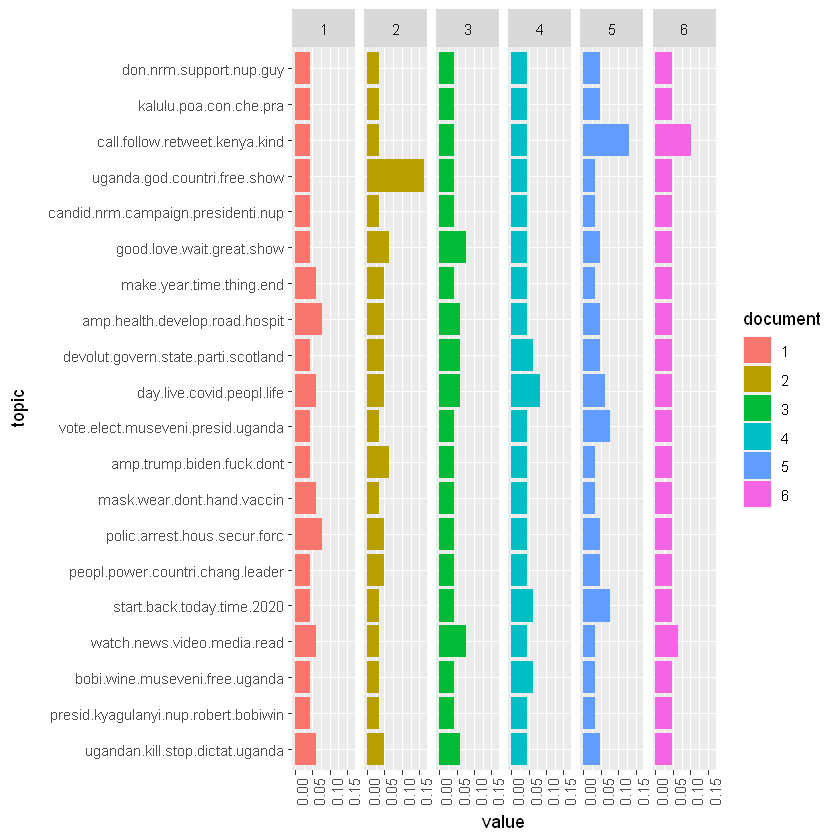

In [49]:
N <- length(exampleIds)
# get topic proportions form example documents
topicProportionExamples <- theta[exampleIds,]
colnames(topicProportionExamples) <- topicNames
vizDataFrame <- melt(cbind(data.frame(topicProportionExamples), document = factor(1:N)), variable.name = "topic", id.vars = "document")  
ggplot(data = vizDataFrame, aes(topic, value, fill = document), ylab = "proportion") + 
  geom_bar(stat="identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +  
  coord_flip() +
  facet_wrap(~ document, ncol = N)

In [50]:
# see alpha from previous model
attr(topicModel, "alpha")

[1] 2.5

In [51]:
topicModel2 <- LDA(DTM, K, method="Gibbs", control=list(iter = 1000, verbose = 25, alpha = 0.2))

K = 20; V = 80776; M = 1977100
Sampling 1000 iterations!
Iteration 25 ...
Iteration 50 ...
Iteration 75 ...
Iteration 100 ...
Iteration 125 ...
Iteration 150 ...
Iteration 175 ...
Iteration 200 ...
Iteration 225 ...
Iteration 250 ...
Iteration 275 ...
Iteration 300 ...
Iteration 325 ...
Iteration 350 ...
Iteration 375 ...
Iteration 400 ...
Iteration 425 ...
Iteration 450 ...
Iteration 475 ...
Iteration 500 ...
Iteration 525 ...
Iteration 550 ...
Iteration 575 ...
Iteration 600 ...
Iteration 625 ...
Iteration 650 ...
Iteration 675 ...
Iteration 700 ...
Iteration 725 ...
Iteration 750 ...
Iteration 775 ...
Iteration 800 ...
Iteration 825 ...
Iteration 850 ...
Iteration 875 ...
Iteration 900 ...
Iteration 925 ...
Iteration 950 ...
Iteration 975 ...
Iteration 1000 ...
Gibbs sampling completed!


In [52]:
tmResult <- posterior(topicModel2)
theta <- tmResult$topics
beta <- tmResult$terms
topicNames <- apply(terms(topicModel2, 5), 2, paste, collapse = " ")  # reset topicnames

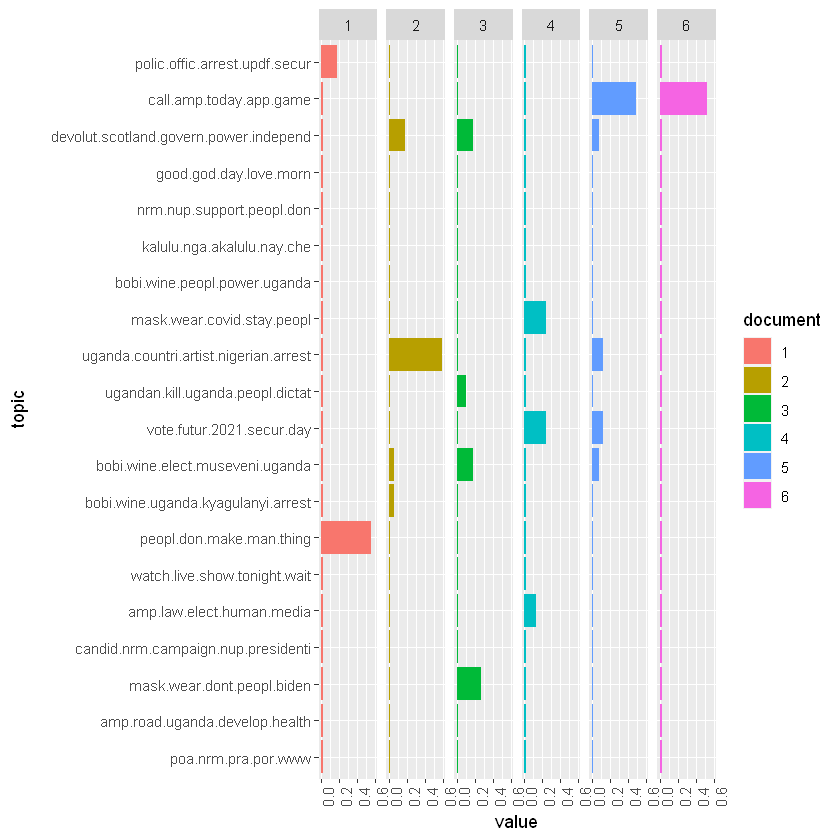

In [53]:
# get topic proportions from example documents
topicProportionExamples <- theta[exampleIds,]
colnames(topicProportionExamples) <- topicNames
vizDataFrame <- melt(cbind(data.frame(topicProportionExamples), document = factor(1:N)), variable.name = "topic", id.vars = "document")  
ggplot(data = vizDataFrame, aes(topic, value, fill = document), ylab = "proportion") + 
  geom_bar(stat="identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +  
  coord_flip() +
  facet_wrap(~ document, ncol = N)

In [54]:
# The most probable topics in the entire tweet data
topicProportions <- colSums(theta) / nDocs(DTM)  # mean probabilities over all tweets
names(topicProportions) <- topicNames     # assign the tweet topic names we created before
sort(topicProportions, decreasing = TRUE) # show summed proportions in decreased order

bobi wine uganda kyagulanyi arrest             mask wear dont peopl biden 
                            0.05770602                             0.05702078 
          watch live show tonight wait             mask wear covid stay peopl 
                            0.05494188                             0.05341835 
              peopl don make man thing              nrm nup support peopl don 
                            0.05181737                             0.05147712 
       bobi wine elect museveni uganda           bobi wine peopl power uganda 
                            0.05072333                             0.05035237 
devolut scotland govern power independ                 good god day love morn 
                            0.04996767                             0.04916982 
    candid nrm campaign nup presidenti         amp road uganda develop health 
                            0.04909602                             0.04869400 
 uganda countri artist nigerian arrest       ugandan kill uganda peopl dictat 
                            0.04859410                             0.04848567 
             amp law elect human media          polic offic arrest updf secur 
                            0.04844536                             0.04771356 
               call amp today app game              vote futur 2021 secur day 
                            0.04636973                             0.04618822 
            kalulu nga akalulu nay che                    poa nrm pra por www 
                            0.04605488                             0.04376376

In [55]:
soP <- sort(topicProportions, decreasing = TRUE)
paste(round(soP, 5), ":", names(soP))

[1] "0.05771 : bobi wine uganda kyagulanyi arrest"    
 [2] "0.05702 : mask wear dont peopl biden"            
 [3] "0.05494 : watch live show tonight wait"          
 [4] "0.05342 : mask wear covid stay peopl"            
 [5] "0.05182 : peopl don make man thing"              
 [6] "0.05148 : nrm nup support peopl don"             
 [7] "0.05072 : bobi wine elect museveni uganda"       
 [8] "0.05035 : bobi wine peopl power uganda"          
 [9] "0.04997 : devolut scotland govern power independ"
[10] "0.04917 : good god day love morn"                
[11] "0.0491 : candid nrm campaign nup presidenti"     
[12] "0.04869 : amp road uganda develop health"        
[13] "0.04859 : uganda countri artist nigerian arrest" 
[14] "0.04849 : ugandan kill uganda peopl dictat"      
[15] "0.04845 : amp law elect human media"             
[16] "0.04771 : polic offic arrest updf secur"         
[17] "0.04637 : call amp today app game"               
[18] "0.04619 : vote futur 2021 secur day"             
[19] "0.04605 : kalulu nga akalulu nay che"            
[20] "0.04376 : poa nrm pra por www"

In [56]:
countsOfPrimaryTopics <- rep(0, K)
names(countsOfPrimaryTopics) <- topicNames
for (i in 1:nDocs(DTM)) {
  topicsPerDoc <- theta[i, ] # select topic distribution for document i
  # get first element position from ordered list
  primaryTopic <- order(topicsPerDoc, decreasing = TRUE)[1] 
  countsOfPrimaryTopics[primaryTopic] <- countsOfPrimaryTopics[primaryTopic] + 1
}
sort(countsOfPrimaryTopics, decreasing = TRUE)

mask wear dont peopl biden           watch live show tonight wait 
                                147286                                 142562 
    bobi wine uganda kyagulanyi arrest               peopl don make man thing 
                                136224                                 106185 
                   poa nrm pra por www     candid nrm campaign nup presidenti 
                                105135                                 103769 
       bobi wine elect museveni uganda             mask wear covid stay peopl 
                                 99664                                  98946 
        amp road uganda develop health              nrm nup support peopl don 
                                 97297                                  96373 
             amp law elect human media  uganda countri artist nigerian arrest 
                                 92953                                  92391 
            kalulu nga akalulu nay che           bobi wine peopl power uganda 
                                 90890                                  88675 
      ugandan kill uganda peopl dictat              vote futur 2021 secur day 
                                 87730                                  85097 
devolut scotland govern power independ                 good god day love morn 
                                 81981                                  81388 
         polic offic arrest updf secur                call amp today app game 
                                 73067                                  69487

In [57]:
so <- sort(countsOfPrimaryTopics, decreasing = TRUE)
paste(so, ":", names(so))

[1] "147286 : mask wear dont peopl biden"           
 [2] "142562 : watch live show tonight wait"         
 [3] "136224 : bobi wine uganda kyagulanyi arrest"   
 [4] "106185 : peopl don make man thing"             
 [5] "105135 : poa nrm pra por www"                  
 [6] "103769 : candid nrm campaign nup presidenti"   
 [7] "99664 : bobi wine elect museveni uganda"       
 [8] "98946 : mask wear covid stay peopl"            
 [9] "97297 : amp road uganda develop health"        
[10] "96373 : nrm nup support peopl don"             
[11] "92953 : amp law elect human media"             
[12] "92391 : uganda countri artist nigerian arrest" 
[13] "90890 : kalulu nga akalulu nay che"            
[14] "88675 : bobi wine peopl power uganda"          
[15] "87730 : ugandan kill uganda peopl dictat"      
[16] "85097 : vote futur 2021 secur day"             
[17] "81981 : devolut scotland govern power independ"
[18] "81388 : good god day love morn"                
[19] "73067 : polic offic arrest updf secur"         
[20] "69487 : call amp today app game"